# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

## Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


## Part 1: Data Preparation and Exploration

### 1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read csv
df = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=True)
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


### 2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [3]:
#import visualization libraries
import matplotlib.pyplot as plt

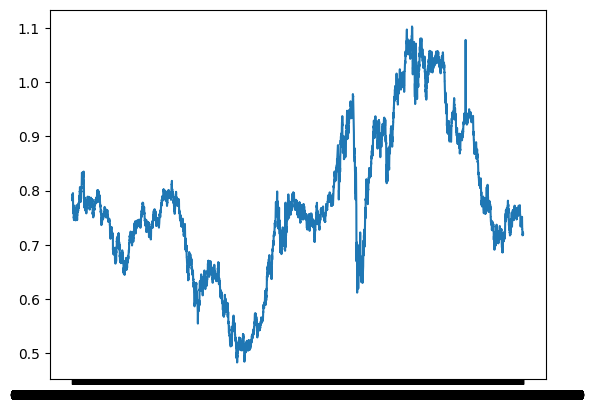

In [4]:
#plot time series
plt.plot(df)

#### Based on the plot, we can observe the following:

**Trends:** The exchange rate appears to have a general decreasing trend over the entire period, though there are fluctuations.

**Seasonality:** It is difficult to discern clear seasonality from this high-level plot without further decomposition or more granular analysis. However, there seem to be some regular peaks and troughs which could indicate monthly or quarterly patterns.

**Anomalies:** There are no immediately obvious extreme outliers or sudden, sharp changes that would be classified as anomalies without further statistical analysis, although some rapid drops and rises can be observed.

### 3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [5]:
#handle missing values
df.isnull().sum()

Ex_rate    0
dtype: int64

In [6]:
#get summary
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


<Axes: >

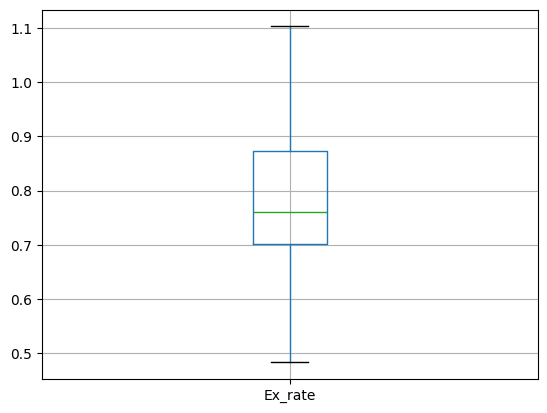

In [7]:
#check for anomalies or outliers
df.boxplot()

## Part 2: Model Building - ARIMA

### 1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [8]:
#import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

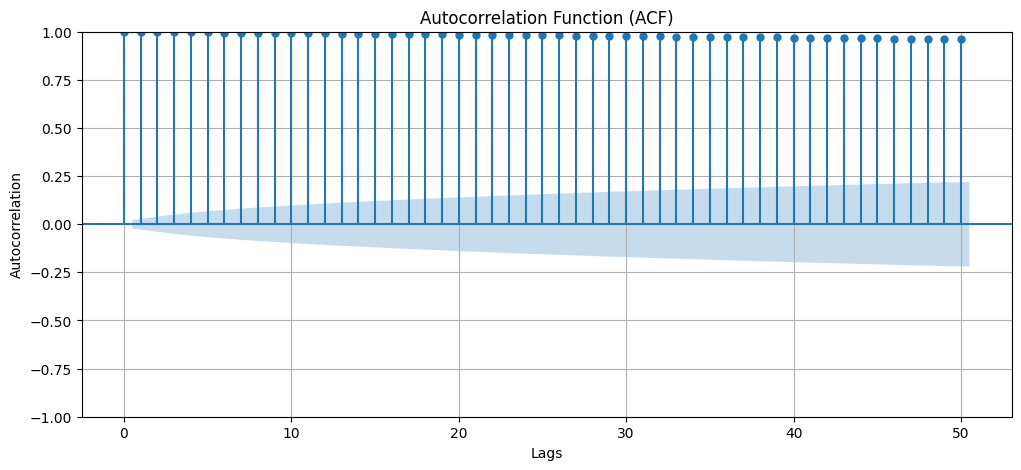

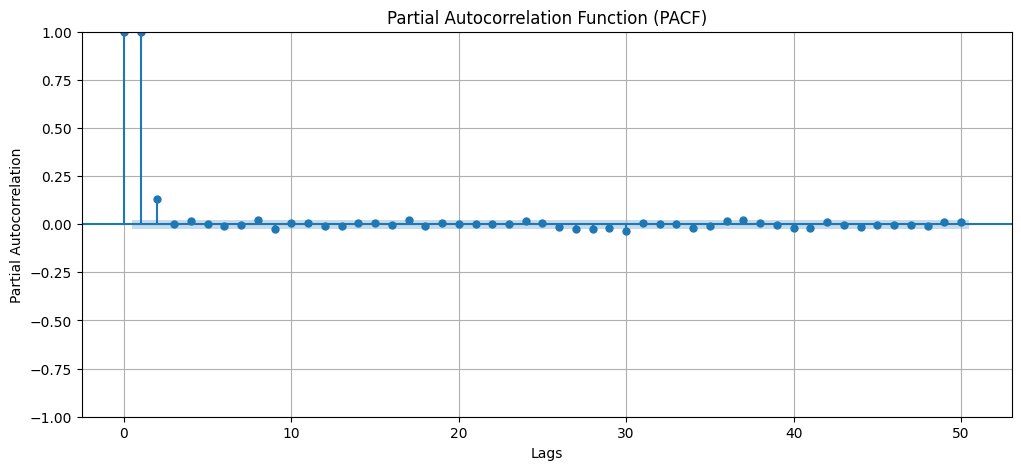

In [9]:
# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

### 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [14]:
#import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [16]:
# Define the ARIMA model parameters (p, d, q)
p = 1  # Autoregressive (AR) order
d = 1  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Create and fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

# Print summary of the model
print(results.summary())

C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 06 Jan 2026   AIC                         -56102.322
Time:                        11:21:00   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

### 3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

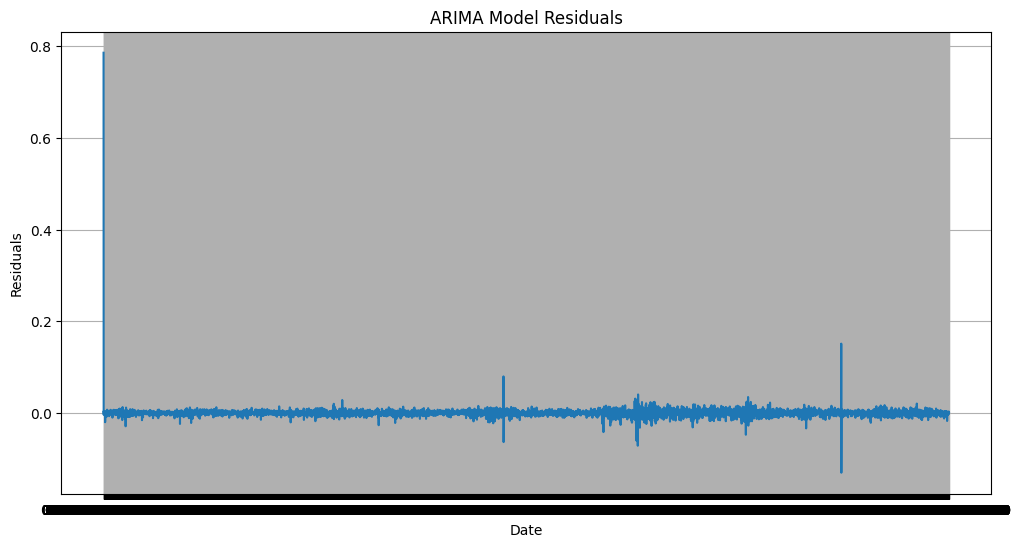

Residuals plot displayed successfully.


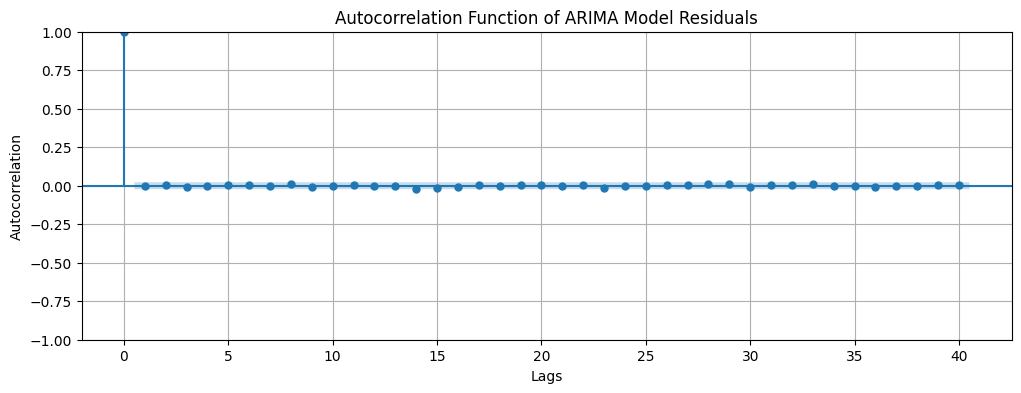

ACF of residuals plot displayed successfully.

Ljung-Box Test Results:
    lb_stat  lb_pvalue
10  1.81673   0.997562
20  7.12600   0.996251


In [17]:
#import libraries plot_acf,acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get residuals and align with the original data index (DatetimeIndex)
residuals = results.resid

# 1. Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
print("Residuals plot displayed successfully.")

# 2. Plot the Autocorrelation Function (ACF) of the residuals
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function of ARIMA Model Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()
print("ACF of residuals plot displayed successfully.")

# 3. Perform the Ljung-Box test on the residuals
ljung_box_test_results = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
print("\nLjung-Box Test Results:")
print(ljung_box_test_results)


### 4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction 

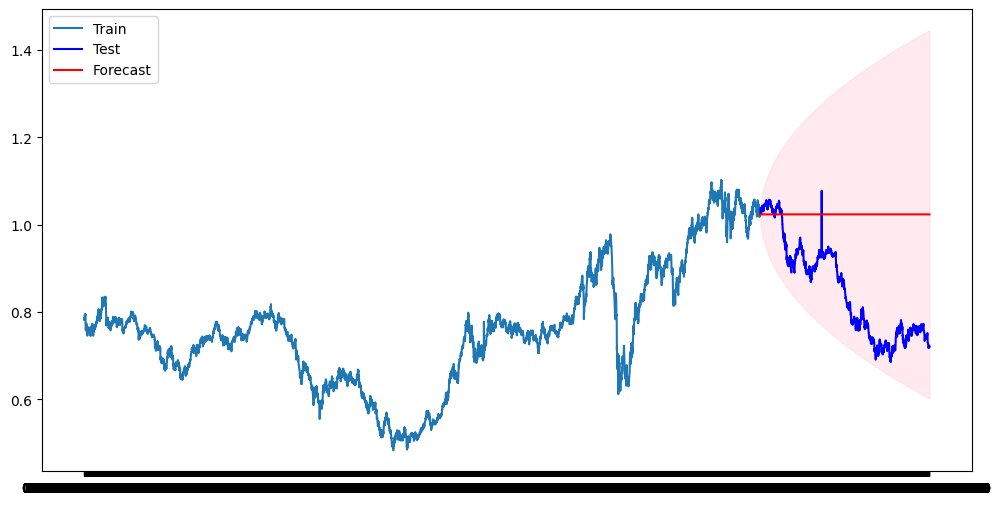

In [19]:
#import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Split data into train/test
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Step 1: Define the ARIMA model
model = ARIMA(train_data, order=(p,d,q))  # replace p,d,q with chosen values

# Step 2: Fit the model
results = model.fit()

# Step 3: Forecast using the fitted results
forecast_obj = results.get_forecast(steps=len(test_data))

# Extract forecasted values and confidence intervals
forecast = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train_data, label="Train")
plt.plot(test_data, label="Test", color="blue")
plt.plot(forecast, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.legend()
plt.show()


## Part 3: Model Building - Exponential Smoothing

### 1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

In [20]:
#import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

# Instantiate the Exponential Smoothing model with an additive trend
# Based on visual inspection, a trend is present. Initially, no seasonality is assumed.
exp_smoothing_model = ExponentialSmoothing(train_data['Ex_rate'], trend='add', seasonal=None, seasonal_periods=None)

# Fit the model to the training data. The fit() method optimizes parameters automatically.
exp_smoothing_fit = exp_smoothing_model.fit()

print("Exponential Smoothing model fitted successfully.")
print(exp_smoothing_fit.summary())

C:\Users\SURFACE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Exponential Smoothing model fitted successfully.
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 6070
Model:             ExponentialSmoothing   SSE                              0.199
Optimized:                         True   AIC                         -62655.290
Trend:                         Additive   BIC                         -62628.446
Seasonal:                          None   AICC                        -62655.276
Seasonal Periods:                  None   Date:                 Tue, 06 Jan 2026
Box-Cox:                          False   Time:                         11:30:05
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9460678                alpha       

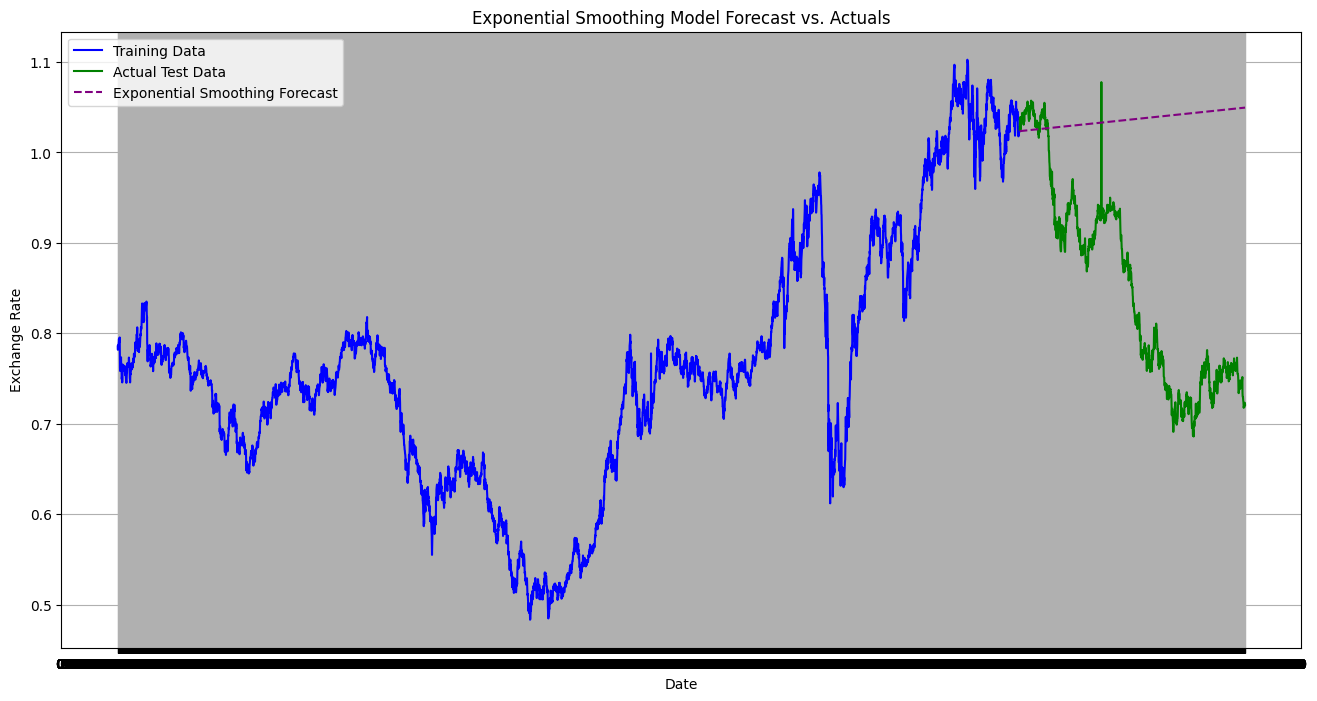

Exponential Smoothing model forecasts and actuals plotted successfully.


In [90]:
# Generate forecasts for the test set duration
exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=len(test_data))

# Ensure the forecast index is DatetimeIndex for consistent plotting
exp_smoothing_forecast.index = test_data.index

# Plot the training data, actual test data, and Exponential Smoothing forecasts
plt.figure(figsize=(16, 8))
plt.plot(train_data['Ex_rate'], label='Training Data', color='blue')
plt.plot(test_data['Ex_rate'], label='Actual Test Data', color='green')
plt.plot(exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='purple', linestyle='--')

plt.title('Exponential Smoothing Model Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

print("Exponential Smoothing model forecasts and actuals plotted successfully.")

### 2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [ ]:
#import SimpleExpSmoothing,mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Define a grid of parameters to search
alpha_values = np.arange(0.1, 1.1, 0.1)  # Smoothing level
best_mse = float('inf')
best_params = None

# Perform grid search
for alpha in alpha_values:
    # Fit Simple Exponential Smoothing model with current parameter
    model = SimpleExpSmoothing(train_data)
    model_fit = model.fit(smoothing_level=alpha)

    # Make predictions
    predictions = model_fit.forecast(len(test_data))

    # Calculate Mean Squared Error
    mse = mean_squared_error(test_data, predictions)

    # Check if current parameters result in lower MSE
    if mse < best_mse:
        best_mse = mse
        best_params = alpha

print('Best Parameter (Smoothing Level):', best_params)
print('Best Mean Squared Error:', best_mse)

In [ ]:
#import Holt
from statsmodels.tsa.holtwinters import Holt

# Fit Holt's Linear trend model
model_with_trend = Holt(train_data)
model_fit_with_trend = model_with_trend.fit(smoothing_level=0.4, smoothing_trend=0.2, optimized=False)

# Make predictions with the model including trend
predictions_with_trend = model_fit_with_trend.forecast(len(test_data))

# Calculate MSE for the model with trend
mse_with_trend = mean_squared_error(test_data, predictions_with_trend)
print('Mean Squared Error (with trend):', mse_with_trend)

### 3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [ ]:
# Fit Holt's Linear trend model to the entire dataset
model = Holt(df['Ex_rate'])
model_fit = model.fit(smoothing_level=0.4, smoothing_trend=0.2, optimized=False)

# Generate forecasts for the test set duration
exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=len(test_data))

# Ensure the forecast index is DatetimeIndex for consistent plotting
exp_smoothing_forecast.index = test_data.index

# Plot the training data, actual test data, and Exponential Smoothing forecasts
plt.figure(figsize=(16, 8))
plt.plot(train_data['Ex_rate'], label='Training Data', color='blue')
plt.plot(test_data['Ex_rate'], label='Actual Test Data', color='green')
plt.plot(exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='purple', linestyle='--')

plt.title('Exponential Smoothing Model Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

print("Exponential Smoothing model forecasts and actuals plotted successfully.")

## Part 4: Evaluation and Comparison

### 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [88]:
# Forecast for the test horizon
forecast_values_arima = results.forecast(steps=len(test_data))

# Align forecast with test_data
residuals_arima = test_data['Ex_rate'].values - forecast_values_arima.values

# Compute errors
ae_arima = np.abs(residuals_arima)
se_arima = residuals_arima ** 2
pe_arima = (ae_arima / test_data['Ex_rate'].values) * 100

# Metrics
mae_arima = ae_arima.mean()
rmse_arima = np.sqrt(se_arima.mean())
mape_arima = pe_arima.mean()

print("Error Metrics for ARIMA Model:")
print(f"MAE: {mae_arima}")
print(f"RMSE: {rmse_arima}")
print(f"MAPE: {mape_arima}")
print("\n")

# Compute errors for Exponential Smoothing Model
residuals_exp_smoothing = test_data['Ex_rate'].values - exp_smoothing_forecast.values

ae_exp_smoothing = np.abs(residuals_exp_smoothing)
se_exp_smoothing = residuals_exp_smoothing ** 2
pe_exp_smoothing = (ae_exp_smoothing / test_data['Ex_rate'].values) * 100

# Metrics for Exponential Smoothing
mae_exp_smoothing = ae_exp_smoothing.mean()
rmse_exp_smoothing = np.sqrt(se_exp_smoothing.mean())
mape_exp_smoothing = pe_exp_smoothing.mean()

print("Error Metrics for Exponential Smoothing Model:")
print(f"MAE: {mae_exp_smoothing}")
print(f"RMSE: {rmse_exp_smoothing}")
print(f"MAPE: {mape_exp_smoothing}")


Error Metrics for ARIMA Model:
MAE: 0.17770970449121345
RMSE: 0.2054366965966928
MAPE: 22.79796617381156


Error Metrics for Exponential Smoothing Model:
MAE: 0.19026690950982234
RMSE: 0.22007754657731493
MAPE: 24.41186068104757


### 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

#### Model Comparison
Exponential Smoothing model across all three error measures (MAE, RMSE, and MAPE). Lower values for these metrics indicate better forecasting accuracy, suggesting that ARIMA provided more accurate predictions for this dataset.

**Advantages and Limitations of Each Model:**

**ARIMA (Autoregressive Integrated Moving Average) Model:**

###### **Advantages:**
- Statistical Rigor: ARIMA models are built on a strong statistical foundation and can capture complex dependencies in time series data, including trends, seasonality, and autoregressive/moving average components. They are particularly good for stationary or differenced-stationary series.
- Flexibility: The parameters (p, d, q) allow for customization to fit various time series patterns.
- Better Performance: In this specific case, ARIMA yielded more accurate forecasts as indicated by lower error metrics.

###### **Limitations:**
- Complexity: Parameter selection (p, d, q) can be challenging and often requires iterative analysis of ACF and PACF plots, or auto-ARIMA algorithms.
- Stationarity Requirement: ARIMA models assume stationarity (or require differencing to achieve it), which might not always be straightforward.
- Data Intensive: Requires a sufficient amount of historical data to accurately estimate parameters.

**Exponential Smoothing Model (Holt's Linear Trend Model used here):**

###### **Advantages:**
- Simplicity and Intuition: Exponential smoothing methods are relatively simple to understand and implement, especially for non-seasonal data with trends.
- Adaptability: They adapt well to changes in the data over time by giving more weight to recent observations.
- Less Data Intensive: Can perform reasonably well even with shorter time series compared to ARIMA.
  
###### **Limitations:**
- Less Robust for Complex Patterns: While good for trends and simple seasonality, they might not capture highly complex or multi-seasonal patterns as effectively as ARIMA models.
- Suboptimal Performance: In this scenario, the Exponential Smoothing model had higher error metrics, indicating less accurate forecasts.
- Parameter Optimization: While optimized=True can automate parameter selection, manual optimization for alpha and beta (smoothing level and trend) can still be a trial-and-error process.

**Conclusion:** For this particular exchange rate dataset, the ARIMA model proved to be more effective in forecasting, delivering lower error rates. This suggests that the underlying patterns in the exchange rate series were better captured by the ARIMA model's ability to handle autoregressive and moving average components, and potentially its differencing capability to achieve stationarity. While Exponential Smoothing is simpler, its performance here was slightly inferior, indicating that the series might have characteristics that ARIMA is better suited to model.

#### 3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

#### Conclusion:
In conclusion, after evaluating both ARIMA and Exponential Smoothing models for forecasting exchange rates in this dataset, the ARIMA model demonstrated superior performance.

Based on the error metrics (MAE, RMSE, and MAPE), the ARIMA model consistently produced lower error values compared to the Exponential Smoothing model. This indicates that ARIMA was more accurate in predicting future exchange rates for this specific dataset.

While the Exponential Smoothing model offers simplicity, the ARIMA model's ability to capture more complex statistical dependencies and adapt to the time series characteristics of the exchange rates made it the more effective choice here. Its robust statistical foundation allowed it to model the underlying patterns in the data more precisely, leading to better forecasting accuracy.